In [1]:
import sqlite3


def with_connection(do, *args, **kwargs):
    with sqlite3.connect('./saysquares.db') as con:
        return do(connection=con, *args, **kwargs)


In [2]:
def light_dark_correct_by_square(
    connection: sqlite3.Connection,
    _from = None,
    to = None
):
    """
    TODO add _from, to query to get queries by date range
    """
    cur = connection.cursor()
    cur.execute("""
    SELECT square, correct FROM light_dark;
    """
    )
    return cur.fetchall()

`incorrect`/ `incorrect + correct` heatmap

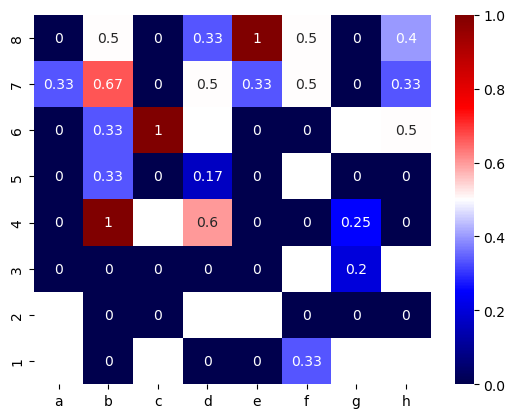

In [3]:
import collections
import math

data = with_connection(light_dark_correct_by_square)
table = collections.defaultdict(lambda: [0, 0])
for square, correct in data:
    if correct:
        table[square][0] +=1
    else:
        table[square][1]+=1

board = [[None for _ in range(8)] for _ in range(8)]    

for key, value in table.items():
    board_x = int(key[1]) -1
   
    board_y =  ord(key[0]) - ord('a')
    try:
        board[board_x][board_y] = value[1] / (value[0] +value[1])
    except ZeroDivisionError:
        board[board_x][board_y] = math.inf
from pandas import pandas as pd
import seaborn as sns       
df = pd.DataFrame(reversed(board), index=reversed([1,2,3,4,5,6,7,8]), columns=["a","b","c","d","e","f","g","h"])
heatmap = sns.heatmap(df, annot=True, cmap='seismic')
fig = heatmap.get_figure()
fig.savefig("accuracy.png") 


median and average time to answer by square

In [4]:
def light_dark_tta_by_square(
    connection: sqlite3.Connection,
    _from = None,
    to = None
):
    """
    TODO add _from, to query to get queries by date range
    """
    cur = connection.cursor()
    cur.execute("""
    SELECT square, time_to_answer FROM light_dark;
    """
    )
    return cur.fetchall()

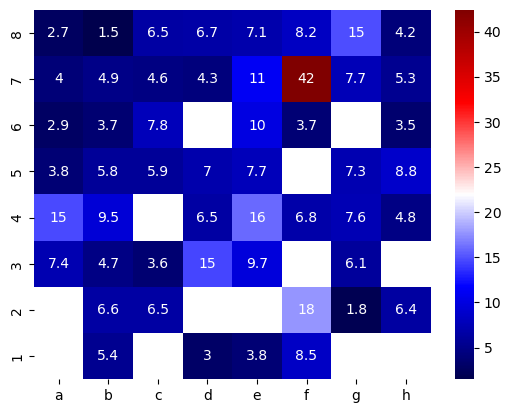

In [5]:
import collections
import statistics

data = with_connection(light_dark_tta_by_square)
table = collections.defaultdict(list)
for square, tta in data:
    table[square].append(tta)

board = [[None for _ in range(8)] for _ in range(8)]    
board2 =[[None for _ in range(8)] for _ in range(8)]    

for key, value in table.items():
    board_x = int(key[1]) -1
   
    board_y =  ord(key[0]) - ord('a')
    board[board_x][board_y] = statistics.median(value)
    board2[board_x][board_y] = statistics.mean(value)

from pandas import pandas as pd
import seaborn as sns       
df = pd.DataFrame(reversed(board), index=reversed([1,2,3,4,5,6,7,8]), columns=["a","b","c","d","e","f","g","h"])
heatmap = sns.heatmap(df, annot=True, cmap='seismic')
fig = heatmap.get_figure()
fig.savefig("median-time-to-answer.png") 

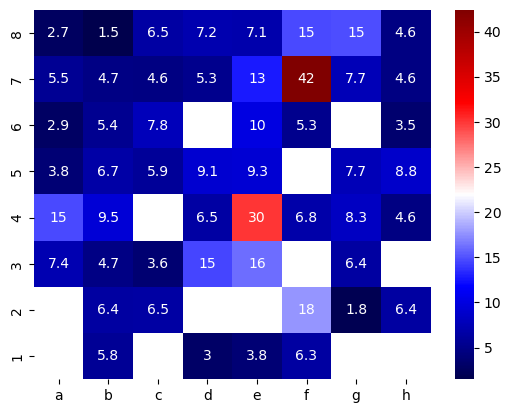

In [6]:
df = pd.DataFrame(reversed(board2), index=reversed([1,2,3,4,5,6,7,8]), columns=["a","b","c","d","e","f","g","h"])
heatmap = sns.heatmap(df, annot=True, cmap='seismic')
fig = heatmap.get_figure()
fig.savefig("mean-time-to-answer.png") 